## SETUP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# if you want, you can use the below script to automatically find where the directory is in your GDrive and cd into it.
%cd '/content/drive'
directory_name = !find . -type d -name "ucl-nlp-finalproject"
directory_name = directory_name[0]
%cd $directory_name

/content/drive
/content/drive/My Drive/Marshall Scholarship/UCL/NLP Class/Code/ucl-nlp-finalproject


In [3]:
%pwd

'/content/drive/My Drive/Marshall Scholarship/UCL/NLP Class/Code/ucl-nlp-finalproject'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import time 
import pickle
import os
from collections import defaultdict
from datetime import datetime
import sys
sys.path.append('..')
import waku
from waku.tasks.word_analogies.analogies import get_wordanalogy_scores
import importlib
importlib.reload(waku.tasks.word_analogies.analogies)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device used: ", device)

Device used:  cuda


In [0]:
# EXPERIMENT_FOLDER_NAME = ""
# assert EXPERIMENT_FOLDER_NAME in ['hoyer_1000', 'hoyer_300', 'spine_1000_1000', 'spine_300_1000', 'spine_300_300', 'vanilla_1000', 'vanilla_300']
# assert len(EXPERIMENT_FOLDER_NAME) != 0

In [0]:
## Load embeddings from .npy file and load W2V_dict (word to id) from pickle file
PATH_TO_300_1_HS_EMBEDS = ['../../word2vec_data/300_1.0/' + x for x in os.listdir('../../word2vec_data/300_1.0/') if x[-3:] == 'npz' ]
PATH_TO_300_0_01_HS_EMBEDS = ['../../word2vec_data/300_0.01/' + x for x in os.listdir('../../word2vec_data/300_0.01/') if x[-3:] == 'npz' ]
PATH_TO_SPINE_300_EMBEDS = ['../../spine_embeddings/20percent_sim/' + x for x in os.listdir('../../spine_embeddings/20percent_sim/') if x[-3:] == 'npz' and '300' in x]
PATH_TO_SPINE_1000_EMBEDS = ['../../spine_embeddings/20percent_sim/' + x for x in os.listdir('../../spine_embeddings/20percent_sim/') if x[-3:] == 'npz' and '1000' in x]
PATH_TO_VANILLA_300_EMBEDS = ['../../word2vec_data/vanilla/' + x for x in os.listdir('../../word2vec_data/vanilla/') if x[-3:] == 'npz' and '300' in x]
PATH_TO_VANILLA_1000_EMBEDS = ['../../word2vec_data/vanilla/' + x for x in os.listdir('../../word2vec_data/vanilla/') if x[-3:] == 'npz' and '1000' in x]


embedding_paths_dict = {}
embedding_paths_dict['hs_300_1'] = PATH_TO_300_1_HS_EMBEDS
embedding_paths_dict['hs_300_0_01'] = PATH_TO_300_0_01_HS_EMBEDS
embedding_paths_dict['spine_300'] = PATH_TO_SPINE_300_EMBEDS
embedding_paths_dict['spine_1000'] = PATH_TO_SPINE_1000_EMBEDS
embedding_paths_dict['vanilla_300'] = PATH_TO_VANILLA_300_EMBEDS
embedding_paths_dict['vanilla_1000'] = PATH_TO_VANILLA_1000_EMBEDS

### ANALOGIES

In [28]:
embed_accuracies = defaultdict(list)
embed_times = defaultdict(list)
total_embeds = sum([len(item) for key, item in embedding_paths_dict.items()])
with open('../../word2vec_data/word2index.pickle', 'rb') as handle:
  W2V_dict = pickle.load(handle)

i = 0
for model_setting, embed_paths in embedding_paths_dict.items():
  for embed_path in embed_paths:
    if 'word2vec' in embed_path:
      W2V_weights = np.load(embed_path)['a']
    elif 'spine' in embed_path:
      W2V_weights = np.load(embed_path)['arr_0']
    else:
      raise Error("Not sure how to parse npz file based on filepath name")

    scores, total_correct, total_found, total_accuracy, total_time = get_wordanalogy_scores("./waku/data/raw/", W2V_dict, W2V_weights, True, verbose = False) # False means we have embeddings for uppercased words, True means embeddings for lowercase
    embed_accuracies[model_setting].append(total_accuracy) # in order of sparsities 
    embed_times[model_setting].append(total_time)
    i +=1 
    # print("Completed, takes: {} seconds".format(total_time))
    print('Finished {} out of {} total analogy experiments'.format(i, total_embeds))

Finished 1 out of 22 total analogy experiments
Finished 2 out of 22 total analogy experiments
Finished 3 out of 22 total analogy experiments
Finished 4 out of 22 total analogy experiments
Finished 5 out of 22 total analogy experiments
Finished 6 out of 22 total analogy experiments
Finished 7 out of 22 total analogy experiments
Finished 8 out of 22 total analogy experiments
Finished 9 out of 22 total analogy experiments
Finished 10 out of 22 total analogy experiments
Finished 11 out of 22 total analogy experiments


/content/drive/My Drive/Marshall Scholarship/UCL/NLP Class/Code/ucl-nlp-finalproject/waku/tasks/word_analogies/analogies.py:36: RuntimeWarning: invalid value encountered in true_divide
  embeddings = embeddings / np.sqrt((embeddings ** 2).sum(1))[:, None]


Fixed NaNs from zero division
Finished 12 out of 22 total analogy experiments
Fixed NaNs from zero division
Finished 13 out of 22 total analogy experiments
Fixed NaNs from zero division
Finished 14 out of 22 total analogy experiments
Fixed NaNs from zero division
Finished 15 out of 22 total analogy experiments
Finished 16 out of 22 total analogy experiments
Finished 17 out of 22 total analogy experiments
Finished 18 out of 22 total analogy experiments
Finished 19 out of 22 total analogy experiments
Finished 20 out of 22 total analogy experiments
Finished 21 out of 22 total analogy experiments
Finished 22 out of 22 total analogy experiments


In [0]:
# EXPERIMENT_EMBEDDINGS_NAME = ""
# with open('../waku/data/scores/{}/{}.txt'.format(EXPERIMENT_FOLDER_NAME,'analogies_' + str(datetime.now())) + '_' + EXPERIMENT_EMBEDDINGS_NAME, 'w') as out:
#   out.write("Total accuracy: {}. Total correct {} out of total found {}".format(total_accuracy, total_correct, total_found))

NameError: ignored

vanilla_300 [0.019877431388222754]
vanilla_1000 [0.007247535305089262]


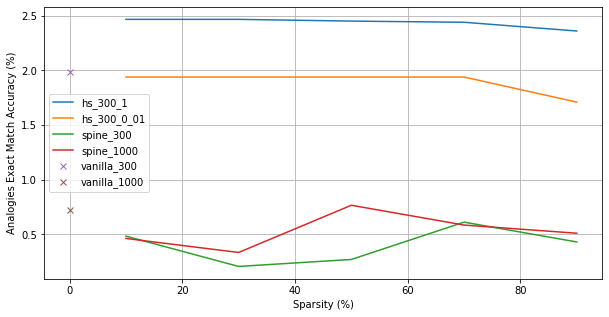

In [29]:
# plot results 
plt.figure(figsize=(10,5))
for key, item in embed_accuracies.items():
  if 'vanilla' in key: 
    print(key, item)
    plt.plot(0, item[0] * 100, 'x', label=key)
  else:
    plt.plot([10, 30, 50, 70, 90], [i * 100 for i in item], label=key)

plt.xlabel('Sparsity (%)')
plt.ylabel('Analogies Exact Match Accuracy (%)')
plt.legend()
plt.grid()
plt.show()

In [23]:
# debug spine 
PATH_TO_SPINE_300_EMBEDS = ['../../spine_embeddings/20percent_sim/' + x for x in os.listdir('../../spine_embeddings/20percent_sim/') if x[-3:] == 'npz' and '300' in x]

with open('../../word2vec_data/word2index.pickle', 'rb') as handle:
  W2V_dict = pickle.load(handle)

i = 0
for embed_path in PATH_TO_SPINE_300_EMBEDS:
  if i ==0: 
    i+=1
    continue
  if 'word2vec' in embed_path:
    W2V_weights = np.load(embed_path)['a']
  elif 'spine' in embed_path:
    W2V_weights = np.load(embed_path)['arr_0']
  else:
    raise Error("Not sure how to parse npz file based on filepath name")
  
  scores, total_correct, total_found, total_accuracy, total_time = get_wordanalogy_scores("./waku/data/raw/", W2V_dict, W2V_weights, True, verbose = False) # False means we have embeddings for uppercased words, True means embeddings for lowercase
  
  i +=1 
  # print("Completed, takes: {} seconds".format(total_time))
  print('Finished {} out of {} total analogy experiments'.format(i, len(embedding_paths_dict.keys()) * 5))
  break


/content/drive/My Drive/Marshall Scholarship/UCL/NLP Class/Code/ucl-nlp-finalproject/waku/tasks/word_analogies/analogies.py:36: RuntimeWarning: invalid value encountered in true_divide
  embeddings = embeddings / np.sqrt((embeddings ** 2).sum(1))[:, None]


Fixed NaNs from zero division
Finished 2 out of 30 total analogy experiments
